# Part II - Investigating the Relationships between Variables in the Prosper Loan Data
## by Zadock Mainda

## Investigation Overview

#### Key Insights

Most of the borrowers in this dataset have a C level credit rating. This is crucial information to assist stakeholder's pinpoint the credit garde of the most borrowers and perhaps commission further exploration into their loan repayment rates. 

The highest number of loans were taken in Jan while the least number of loans was listed in April. Understanding borrowing patterns throghout the year can assist the credit facility prepare incentives in advance to attracts borrowers in low seasons. 

There is a weak but positive relationship between the DebtToIncomeRatio and BorrowerRate variables. As the BorrowerRate increases, DebtToIncomeRatio tends to increase also.

### Dataset Overview

The Prosper Loan Data contains a wide range of information that not only describes the borrowers'  General details and loan specifics but also Estimated Loan yield among many others. These details are spread over 81 separate columns for the 113,937
loans taken at the credit facility between Nov 2005 and Mar 2014. 
Even though most of these variables apply to all loans between 2005 and 2014, there are some that applicable to certain period only. For instance, The prosperScore and ProsperRating are assigned to loan listings that were created after July 2009. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv('loan_clean.csv')

In [3]:
# Sample a 3000 rows instead of loading massive dataset
np.random.seed(1)
loan_sampled = loan_clean.sample(3000)

In [4]:
#Suppoorting base code
#Sort the categorical variables
# temp list to hold ordered items
# change datatype to category


sorted_credits = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
loan_sampled['CreditGrade'] = pd.Categorical(loan_sampled['CreditGrade'], sorted_credits, ordered=True)

#Create a month column and change datatype to categorical
loan_sampled['month'] = pd.to_datetime(loan_sampled['ListingCreationDate']).dt.strftime('%b')
#month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
loan_sampled['month'] = pd.Categorical(loan_sampled['month'], categories=months, ordered=True)


#Function to plot vertical bar chart
#Slight modification to function to plot against x axis

def vertical_bar(colname):
    output_bar = sb.countplot(x=loan_sampled[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

#Function to assist with plotting loan_clean barcharts 

def draw_bar(colname):
    output_bar = sb.countplot(y=loan_sampled[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar


### How are credit ratings distributed through the dataset?

Most of the borrowers in this dataset have a C level credit rating. This is crucial information to assist stakeholder's pinpoint the credit garde of the most borrowers and perhaps commission further exploration into their loan repayment rates. 


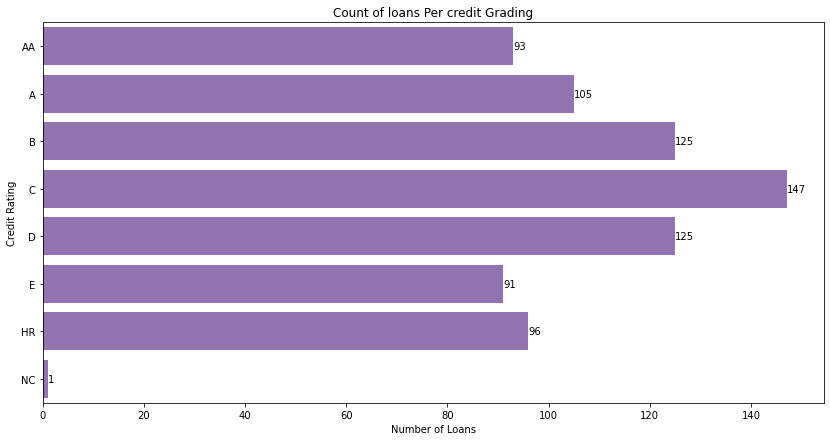

In [5]:
# plot bar chart

plt.figure(figsize = (14,7))

draw_bar('CreditGrade')

plt.xlabel('Number of Loans')
plt.ylabel('Credit Rating')
plt.title('Count of loans Per credit Grading');

### Which is the most common Month for borrowers to take loans?

From our listCreationDate Barchart, the highest number of loans were listed in Jan while the least number of loans was listed in April. There is a continuous downward trend from Jan that ended in April. And then from April We have a clear upwards trend for the second quarter upto July before the number of dips slightly before picking another upwards trend until the last month.

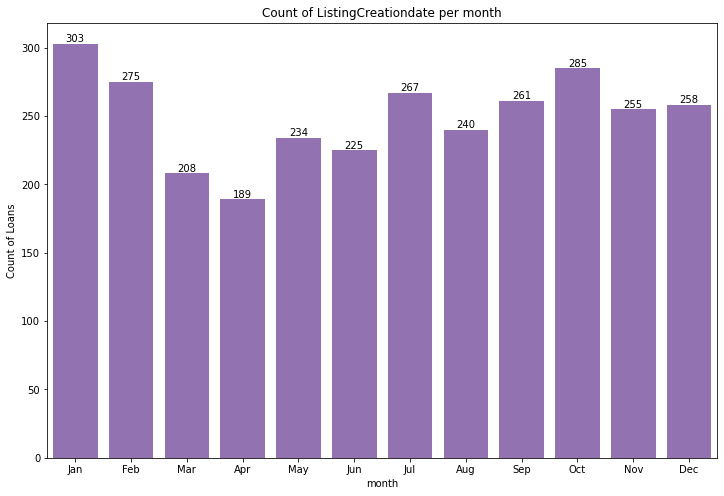

In [6]:
# Plot bar chart

plt.figure(figsize = (12,8))

vertical_bar('month')
plt.ylabel('Count of Loans')
plt.title('Count of ListingCreationdate per month');

### What's the relationship between  DebtToIncomeRatio and BorrowerRate variables?
There is a weak but positive relationship between the DebtToIncomeRatio and BorrowerRate variables. As the BorrowerRate increases, DebtToIncomeRatio tends to increase also.


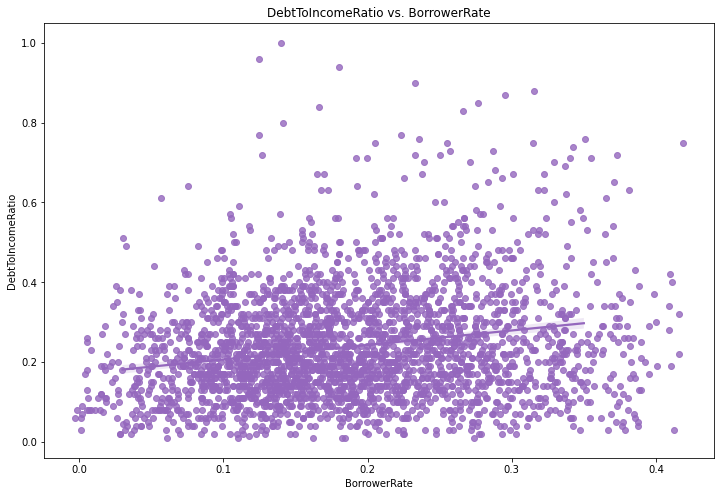

In [7]:
# Limit the Y axis plot to between 0 and 1 where most of the data points lie

plt.figure(figsize=(12,8))
plt.title('DebtToIncomeRatio vs. BorrowerRate')
sb.regplot(data=loan_sampled[loan_sampled.DebtToIncomeRatio <= 1], 
           x='BorrowerRate', y='DebtToIncomeRatio',
           x_jitter=0.07, color=sb.color_palette()[4]
          );

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt